In [76]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Parameters
start = dt.datetime(1992,1,1)
end = dt.datetime.now()
dow = '^DJI'

In [78]:
# pull data back for specific stock, using Yahoo API, in specific date range
dow_df = yf.download(dow, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [79]:
dow_df['Date'] = dow_df.index

In [80]:
dow_df[['Date']] = dow_df[['Date']].apply(pd.to_datetime)

In [81]:
dow_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [82]:
dow_df.head()

,Close,Date
Date,,
1992-01-02,3172.399902,1992-01-02
1992-01-03,3201.500000,1992-01-03
1992-01-06,3200.100098,1992-01-06
1992-01-07,3204.800049,1992-01-07
1992-01-08,3203.899902,1992-01-08


In [83]:
dow_df['Month_Year'] = pd.to_datetime(dow_df['Date']).dt.to_period('M')
dow_df['Day'] = pd.DatetimeIndex(dow_df['Date']).day

In [84]:
dow_df['Min_Date'] = (dow_df.groupby(dow_df['Month_Year'])
                          ['Day'].transform('min')
                       )

In [85]:
dow_df['Max_Date'] = (dow_df.groupby(dow_df['Month_Year'])
                          ['Day'].transform('max')
                       )

In [86]:
dow_df['Start_Month'] = np.where(dow_df['Day']== dow_df['Min_Date'], dow_df['Close'], False)
dow_df['End_Month'] = np.where(dow_df['Day']== dow_df['Max_Date'], dow_df['Close'], False)

In [87]:
min_dow_df = dow_df[dow_df['Start_Month']>0]

In [88]:
max_dow_df = dow_df[dow_df['End_Month']>0]

In [89]:
min_dow_df.drop(['Close', 'Day', 'Min_Date', 'Max_Date', 'End_Month'], axis= 1, inplace = True)
max_dow_df.drop(['Close', 'Day', 'Min_Date', 'Max_Date', 'Start_Month'], axis= 1, inplace = True)
dow_df = pd.merge(min_dow_df, max_dow_df, left_on = ['Month_Year'], right_on = ['Month_Year'])

C:\Users\e20789\AppData\Local\Temp\ipykernel_18776\3338186253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_dow_df.drop(['Close', 'Day', 'Min_Date', 'Max_Date', 'End_Month'], axis= 1, inplace = True)
C:\Users\e20789\AppData\Local\Temp\ipykernel_18776\3338186253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_dow_df.drop(['Close', 'Day', 'Min_Date', 'Max_Date', 'Start_Month'], axis= 1, inplace = True)


In [90]:
dow_df['DOW_%_Change'] = ((dow_df['End_Month'] - dow_df['Start_Month']) / dow_df['Start_Month'])* 100

In [91]:
dow_df['DOW_1mo_Moving_%Change'] = dow_df['DOW_%_Change'].rolling(12).mean()

In [92]:
dow_df['DOW_12mo_%_Change'] = dow_df['End_Month'].pct_change(periods=12)

In [93]:
dow_df['DOW_12mo_%_Change'] = dow_df['DOW_12mo_%_Change']*100

In [94]:
dow_df['DOW_12mo__%Change_Rolling'] = dow_df['DOW_12mo_%_Change'].rolling(12).mean()

In [95]:
dow_df.dropna(inplace=True)

In [96]:
dow_df.drop(['Date_y'], axis = 1, inplace = True)

In [97]:
dow_df.head()

,Date_x,Month_Year,Start_Month,End_Month,DOW_%_Change,DOW_1mo_Moving_%Change,DOW_12mo_%_Change,DOW_12mo__%Change_Rolling
23,1993-12-01,1993-12,3697.080078,3754.090088,1.542028,0.793063,13.722050,7.346145
24,1994-01-03,1994-01,3756.600098,3978.360107,5.903210,1.282982,20.192148,8.804940
25,1994-02-01,1994-02,3964.010010,3832.020020,-3.329709,0.908948,13.682467,9.682192
26,1994-03-01,1994-03,3809.229980,3635.959961,-4.548689,0.331952,5.846970,9.655325
27,1994-04-04,1994-04,3593.350098,3681.689941,2.458426,0.565628,7.414622,10.103398


In [98]:
date = dow_df["Date_x"]
value = dow_df["DOW_12mo__%Change_Rolling"]

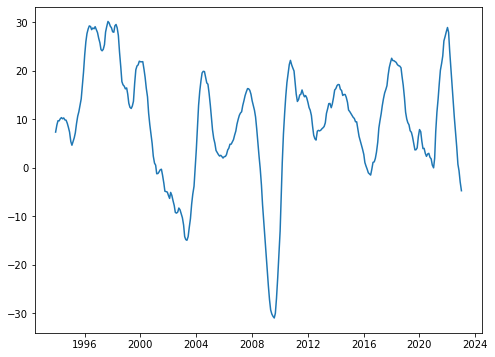

In [99]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, value);

<AxesSubplot:>

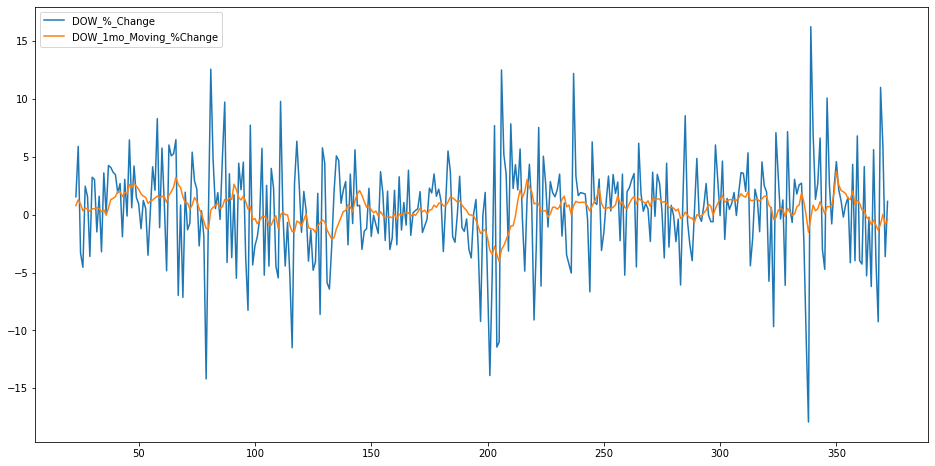

In [100]:
dow_df[['DOW_%_Change', 'DOW_1mo_Moving_%Change']].plot(label='DOW_Jones',
                                  figsize=(16, 8))

<AxesSubplot:>

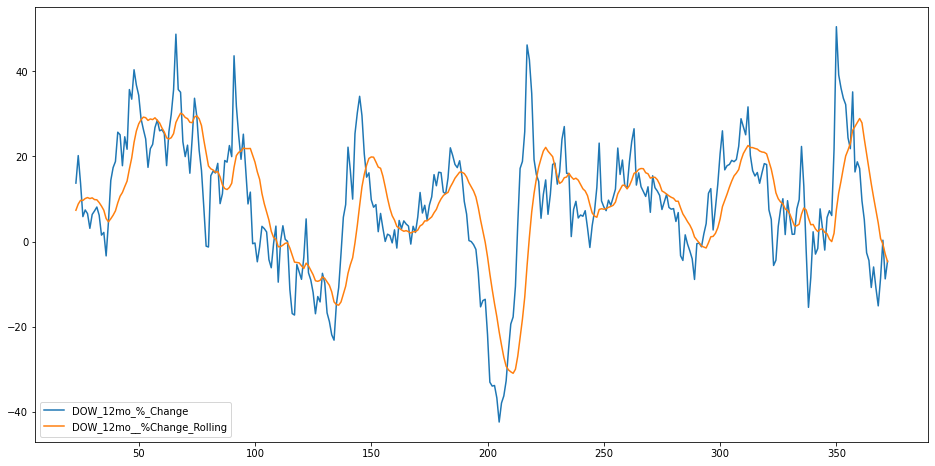

In [101]:
dow_df[['DOW_12mo_%_Change', 'DOW_12mo__%Change_Rolling']].plot(label='DOW_Jones',
                                  figsize=(16, 8))